In [1]:
from plotting_scripts import *


In [12]:
pream0 = "../data_delta/th"
problems = ['ldc3d']
p_range=(3,11)
r_range=(1,3)

def get_frames(pream, ext, p_range=(3,11), r_range=(1,2)):

    df_list = []
    for p in range(*p_range):
        for r in range(*r_range):
            p = str(p).zfill(2)
            file_name = f'{pream}/r{r}_k{p}_{ext}/results.pkl'
            #print(file_name)
            df_list.append(pd.read_pickle(file_name))

    merged_df = pd.concat(df_list, ignore_index=True)
    sorted_df = merged_df.sort_values(by=['order', 'ref'], ascending=[True, True])

    for name in ['nu', 'Re', 'ncells', 'udofs', 'pdofs']:
        try:
            sorted_df.pop(name)
        except:
            pass

    sorted_df = sorted_df.reset_index(drop=True)
    
    return sorted_df



#  hMG

In [13]:
hmg_data =  {}

nu = 3
for problem in problems:
    hmg_problem =  {}
    
    pream = f'{pream0}/hmg/{problem}/parallel'
    hmg = get_frames(pream, "V3", 
               p_range=p_range, r_range=r_range)
    
    hmg_problem[r'$V^{(\nu_h=%s)}_{h\text{MG}}$' % f'{nu}'] = hmg
    
    #plot_all(hmg_problem)
    hmg_data[problem] = hmg_problem
hmg

,order,ref,ndofs,linear_iter,overall_time(s),warm_time(s),resids,solver_params,StokesSolver:init(count),StokesSolver:init(flops),...,VecScatterBegin(flops):Warm,VecScatterBegin(time):Warm,VecScatterEnd(count):Warm,VecScatterEnd(flops):Warm,VecScatterEnd(time):Warm,ASMPatch(size):Warm,ASMPatch(count):Warm,ASMPatch(times):Warm,ASMPatch(flops):Warm,PatchSizes:Warm
0,3,1,98634,20,10.442049,1.166339,"[3.003893344130637, 0.11615356934029085, 0.009...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.377542e+04,...,0.0,0.015584,4836.666667,2.327833e+05,0.336651,[98634],[120.0],[0.7001713920000034],[344613536.6666667],"[{286: 120, 329: 166, 372: 160, 497: 100, 540:..."
1,3,2,15923324,15,96.859700,28.098364,"[2.9283180657706214, 0.11356316656303547, 0.00...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.854089e+05,...,0.0,0.802908,197053.125000,3.545259e+06,3.709187,"[2027568, 15923324]","[90.0, 90.0]","[2.404864145614583, 17.04936811105729]","[2209167695.15625, 17926926039.84375]","[{157: 162, 243: 288, 286: 840, 329: 1588, 372..."
2,4,1,236554,19,21.386390,3.476595,"[3.8105575843118116, 0.1492094700352571, 0.003...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,3.335542e+04,...,0.0,0.033378,4594.833333,4.933809e+05,1.117392,[236554],[114.0],[2.261057603638891],[1169585946.5833333],"[{592: 120, 687: 166, 782: 160, 1077: 100, 117..."
3,4,2,18988336,15,156.587608,45.371725,"[3.74834325100245, 0.14363167452800302, 0.0024...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.047376e+06,...,0.0,0.755419,97406.250000,4.968321e+06,7.642213,"[2415670, 18988336]","[90.0, 90.0]","[4.051828719999993, 27.872624555036456]","[3808380453.28125, 30948797215.3125]","[{307: 126, 592: 528, 687: 952, 782: 880, 887:..."
4,5,1,466874,17,52.757277,8.088489,"[4.934061576551216, 0.1616694180510803, 0.0070...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.836875e+04,...,0.0,0.068718,4111.166667,8.378733e+05,2.607577,[466874],[102.0],[5.223052247750001],[2902063018.6666665],"[{1070: 120, 1249: 166, 1428: 160, 2009: 100, ..."
5,5,2,20837848,14,271.243597,61.384081,"[4.843650046505863, 0.15704714955810858, 0.003...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.531356e+06,...,0.0,0.686978,50855.000000,6.037575e+06,11.050898,"[2649730, 20837848]","[84.0, 84.0]","[5.289632054989594, 36.91863594670835]","[5369509421.0625, 43815387444.9375]","[{1070: 360, 1249: 618, 1651: 648, 1830: 648, ..."
6,6,1,813594,17,131.601224,17.806131,"[7.011455096229436, 0.17644741807836095, 0.005...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.700654e+05,...,0.0,0.123204,4111.166667,1.425902e+06,5.439409,[813594],[102.0],[11.570797438833337],[6844764897.25],"[{1760: 120, 2063: 166, 2366: 160, 3381: 100, ..."
7,6,2,25740452,14,557.204316,131.026272,"[6.861312377262953, 0.17569669985188688, 0.005...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,2.075410e+06,...,0.0,0.779243,36275.750000,8.137853e+06,21.992324,"[3269460, 25740452]","[84.0, 84.0]","[9.24473776107291, 62.298726850166645]","[8839519488.1875, 72174326658.4375]","[{1760: 288, 2063: 478, 3078: 448, 3381: 448, ..."
8,7,1,1300714,19,322.973428,40.618489,"[10.830617112109609, 0.21305535957041327, 0.01...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,3.839454e+05,...,0.0,0.188139,4594.833333,2.508320e+06,11.517297,[1300714],[114.0],[25.393752220902762],[16030973388.5],"[{2702: 120, 3177: 166, 3652: 160, 5281: 100, ..."
9,7,2,17529052,15,808.580303,167.187774,"[10.538650474052114, 0.21165679918615954, 0.00...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.983314e+06,...,0.0,0.492198,17279.062500,7.655100e+06,47.219653,"[2231392, 17529052]","[90.0, 90.0]","[11.21538115841672, 74.13928509281764]","[8274739065.9375, 67784695696.40625]","[{4127: 60, 4806: 180, 2702: 168, 3652: 240, 4..."


# phMG(direct)

In [7]:
phmg_direct_data =  {}

pream = f'{pream0}/phmg/{problem}/parallel'
phmg = get_frames(pream, "V1_p3_h3", p_range=p_range, r_range=r_range)
name = r'$V^{%s}_{ph\text{MG(direct)}}$' % rf'(n_V={1},\nu_p=\nu_h={3})'
phmg_direct_data[name] = phmg


# phMG(gradual)

In [8]:
phmg_grad_data =  {}

pream = f'{pream0}/phmg_grad/{problem}/parallel'
phmg = get_frames(pream, "V1_p3_h3", p_range=p_range, r_range=r_range)
name = r'$V^{%s}_{ph\text{MG(grad)}}$' % rf'(n_V={1},\nu_p=\nu_h={3})'
phmg_grad_data[name] = phmg

phmg

,order,ref,ndofs,linear_iter,overall_time(s),warm_time(s),resids,solver_params,StokesSolver:init(count),StokesSolver:init(flops),...,VecScatterBegin(flops):Warm,VecScatterBegin(time):Warm,VecScatterEnd(count):Warm,VecScatterEnd(flops):Warm,VecScatterEnd(time):Warm,ASMPatch(size):Warm,ASMPatch(count):Warm,ASMPatch(times):Warm,ASMPatch(flops):Warm,PatchSizes:Warm
0,3,1,98634,18,9.549108,1.245397,"[3.003893344130637, 0.13459263135428984, 0.007...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.377542e+04,...,0.0,0.022698,8670.000000,2.819055e+05,0.385359,"[29114, 98634]","[108.0, 108.0]","[0.14598101026388605, 0.6268640316388879]","[57972238.5, 310068069.0]","[{286: 120, 329: 166, 372: 160, 497: 100, 540:..."
1,3,2,15923324,18,113.901234,36.520677,"[2.928318065770622, 0.12789759161007444, 0.003...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.854089e+05,...,0.0,1.224004,445129.875000,4.773664e+06,4.906017,"[579968, 4513884, 15923324]","[108.0, 108.0, 108.0]","[0.7414615943854125, 4.533107597744798, 20.727...","[487393866.0, 3929708808.5625, 21515866943.0625]","[{157: 330, 243: 708, 286: 2520, 329: 9792, 37..."
2,4,1,236554,18,15.987795,3.433772,"[3.8105575843118125, 0.16461837317025843, 0.00...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,3.335542e+04,...,0.0,0.047889,8670.000000,5.398140e+05,1.150209,"[29114, 236554]","[108.0, 108.0]","[0.16570841229166758, 2.164338972722218]","[57972238.5, 1110309097.5]","[{592: 120, 687: 166, 782: 160, 1077: 100, 117..."
3,4,2,18988336,20,159.446006,54.086805,"[3.7483432510024506, 0.15582084670116428, 0.00...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.047376e+06,...,0.0,1.091379,244141.250000,6.217468e+06,8.943408,"[285542, 2206032, 18988336]","[120.0, 120.0, 120.0]","[0.47489412705207795, 2.584190630489599, 37.29...","[261820313.75, 2113817445.0, 41256068621.25]","[{307: 258, 592: 1584, 687: 6012, 782: 2640, 8..."
4,5,1,466874,19,30.002819,8.714709,"[4.934061576551216, 0.17883756680364857, 0.008...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,8.836875e+04,...,0.0,0.085262,9151.666667,1.012869e+06,2.985513,"[29114, 466874]","[114.0, 114.0]","[0.1323804677222178, 5.8599694850555535]","[61192918.416666664, 3240862990.3333335]","[{1070: 120, 1249: 166, 1428: 160, 2009: 100, ..."
5,5,2,20837848,23,276.995396,92.746336,"[4.843650046505863, 0.17028959165057048, 0.010...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.531356e+06,...,0.0,1.174773,156775.187500,8.623261e+06,16.511504,"[158818, 1217704, 20837848]","[138.0, 138.0, 138.0]","[0.3773876403541803, 2.087636374104172, 62.033...","[164407150.28125, 1329715793.59375, 7197767794...","[{1070: 1080, 1249: 4002, 1651: 1944, 1830: 19..."
6,6,1,813594,15,64.447079,17.569963,"[7.011455096229434, 0.14982003128845303, 0.004...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,1.700654e+05,...,0.0,0.144128,10822.500000,1.707994e+06,5.729086,"[29114, 236554, 813594]","[90.0, 90.0, 90.0]","[0.12666853365278424, 1.797113513125, 10.24655...","[48310198.75, 925257581.25, 6048164383.75]","[{592: 120, 687: 166, 782: 160, 1077: 100, 117..."
7,6,2,25740452,16,505.608194,137.962876,"[6.861312377262953, 0.1502541139951111, 0.0051...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,2.075410e+06,...,0.0,1.127990,113908.000000,1.004000e+07,26.503693,"[112724, 859812, 7352740, 25740452]","[96.0, 96.0, 96.0, 96.0]","[0.8362714491562458, 1.0725066858333285, 13.69...","[80016086.5, 648968494.5, 12630577297.5, 82464...","[{592: 864, 687: 3150, 982: 1344, 1077: 1344, ..."
8,7,1,1300714,15,124.774656,30.278852,"[10.830617112109609, 0.208240843487958, 0.0054...","{'ksp_monitor': None, 'petscpartitioner_type':...",1.0,3.839454e+05,...,0.0,0.188164,10822.500000,2.430098e+06,9.197773,"[29114, 236554, 1300714]","[90.0, 90.0, 90.0]","[0.09889242899998942, 1.8301431790833287, 19.1...","[48310198.75, 925257581.25, 12676728692.5]","[{592: 120, 687: 166, 782: 160, 1077: 100, 117..."
9,7,2,17529052

# Combine Data

In [10]:
problem = 'ldc3d'

data_all_ref1 = {}
data_all_ref2 = {}

for data in [hmg_data['ldc3d'], phmg_direct_data, phmg_grad_data]:

    tmp = data.copy()
    #tmp = data_dict[problem]
    k,v = list(tmp.items())[0]
    v = v[v['ref'] == 1]
    data_all_ref1.update({k : v})

    k,v = list(tmp.items())[0]
    v = v[v['ref'] == 2]
    data_all_ref2.update({k : v})



/Users/alexey/repos/tmp/phmg_thesis/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


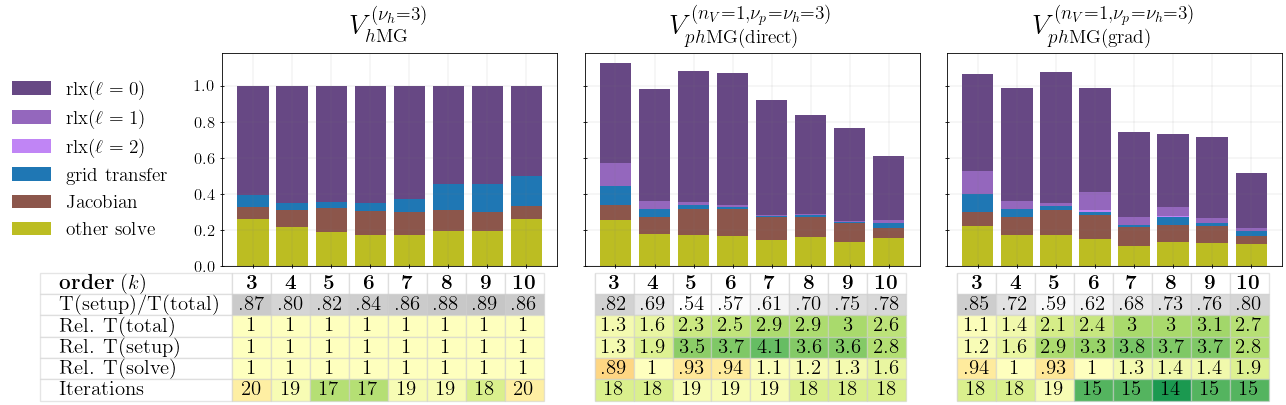

/Users/alexey/repos/tmp/phmg_thesis/data/plot_data/bar_table.py:226: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=4.0, h_pad=4.0, w_pad=2.0)


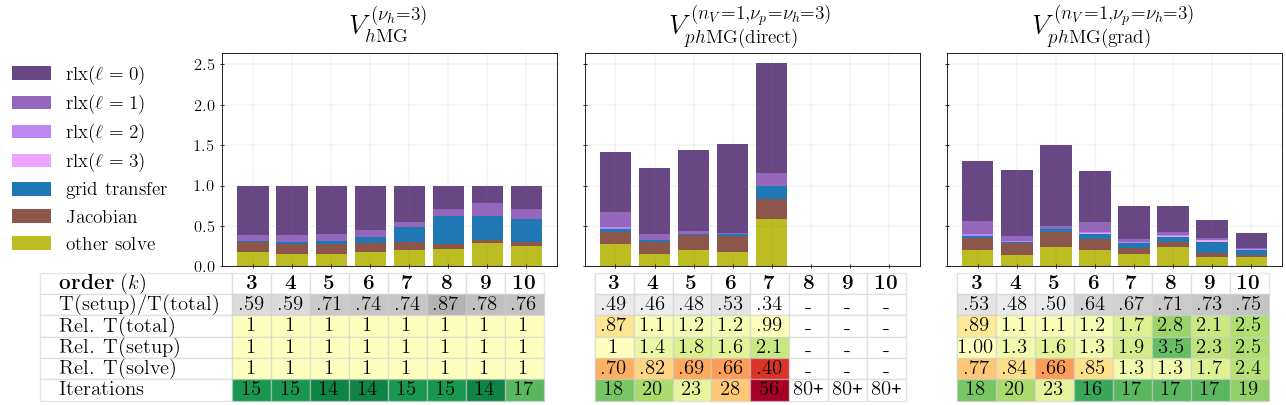

In [11]:
from bar_table import plot_fraction

ref = 1
tmp = plot_fraction(data_all_ref1, f"th_ldc3d_ref{ref}",  th_disc=False)


ref = 2
tmp = plot_fraction(data_all_ref2, f"th_ldc3d_ref{ref}",  th_disc=False)